<a href="https://colab.research.google.com/github/dmswneunju/DeepLearning_signiture/blob/main/ch02_%EC%A0%9C%EC%A1%B0%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/DeepLearning_signiture

/content/drive/MyDrive/DeepLearning_signiture


In [ ]:
pwd

'/content/drive/MyDrive/DeepLearning_signiture'

# 머신러닝 기반 classifier

# 문제정의
### binary classifier

In [ ]:
#라이브럴리 & 데이터 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./data/exercise1.csv')
df

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0
...,...,...,...,...,...,...,...
995,41,0.22,900,0.023,20,1.8,0
996,28,0.31,900,0.020,130,2.6,1
997,15,0.08,1100,0.045,70,1.9,0
998,48,0.39,1200,0.041,50,2.2,0


In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df['target'].value_counts()

0    588
1    412
Name: target, dtype: int64

# 데이터 탐색

In [ ]:
# 데이터 탐색
df.describe()

,a1,a2,a3,a4,a5,a6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.821000,0.283240,821.300000,0.027491,117.180000,1.712600,0.412000
std,10.502631,0.103347,254.560624,0.010786,45.428089,0.707079,0.492441
min,5.000000,0.050000,300.000000,0.005000,20.000000,0.200000,0.000000
25%,25.000000,0.240000,700.000000,0.021000,90.000000,1.300000,0.000000
50%,29.000000,0.290000,900.000000,0.027000,120.000000,1.800000,0.000000
75%,35.000000,0.340000,1000.000000,0.034000,150.000000,2.300000,1.000000
max,50.000000,0.500000,1200.000000,0.050000,200.000000,2.900000,1.000000


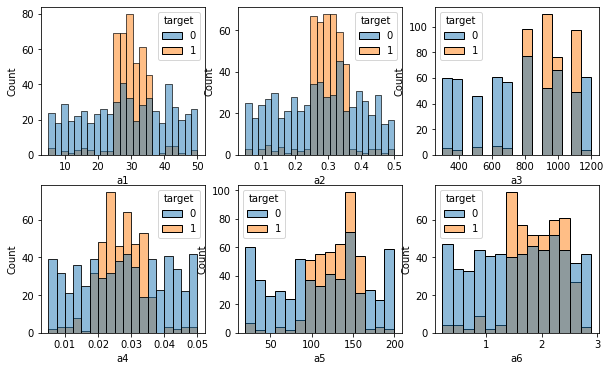

In [ ]:
# 데이터 시각화
nrows, ncols = 2,3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
#fig : 전체 subplot(전체 사이즈), axs : 낱낱개
fig.set_size_inches(10, 6)

for i in range(nrows):
  for j in range(ncols):
    attr = i * ncols + j
    sns.histplot(x=df.columns[attr], data=df, ax=axs[i][j], hue='target')

## 주요 코드 미리보기
----
1. 데이터 분할 : train, test
    - train_test_split
2. 모델 인스턴스 생성
    - DecisionTreseClassifier
3. 모델 학습
    - .fit(X, y)
    - X(독립변수, feature)를 y(종속변수, target)에 맞춘다.
4. 모델 평가
    - classifier : accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 데이터 분할
X = df.iloc[:, :6]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify = y #stratify : 분류기 만들 때 전체 카테고리가 균일하게 분할
)

# 2. 모델 인스턴스 생성
model = DecisionTreeClassifier(random_state=42)

# 3. 모델 학습
model.fit(X_train, y_train)

# 4. 모델 평가
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

# 코드 구현

In [ ]:
#하나의 decisiontree classifier는 과적합될 확률이 높고, 성능이 별로 좋지 않은 모델이다. 
#decisiontree보다 ensemble한 모델들을 사용하는 것이 좋다.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 2. 모델 인스턴스 생성
rf_cls = RandomForestClassifier(random_state=42)
gb_cls = GradientBoostingClassifier(random_state=42)
xgb_cls = XGBClassifier(random_state=42)
lgb_cls = LGBMClassifier(random_state=42)

# 3. 모델 학습
# model_list = [rf_cls, gb_cls, xgb_cls, lgb_cls]
# for model in model_list:
#   model.fit(X_train, y_train)
#   y_pred = model.predict(X_test)
#   m = model.__class__.__name__
#   acc = accuracy_score(y_test, y_pred)
#   print(f'{m} acc = {acc}')

rf_cls.fit(X_train, y_train)
gb_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
lgb_cls.fit(X_train, y_train)

# 4. 모델 평가
y_pred_rf = rf_cls.predict(X_test)
y_pred_gb = gb_cls.predict(X_test)
y_pred_xgb = xgb_cls.predict(X_test)
y_pred_lgb = lgb_cls.predict(X_test)

print('RandomForest accuracy:{}'.format(accuracy_score(y_test, y_pred_rf)))
print('GB accuracy:{}'.format(accuracy_score(y_test, y_pred_gb)))
print('XGB accuracy:{}'.format(accuracy_score(y_test, y_pred_xgb)))
print('LGB accuracy:{}'.format(accuracy_score(y_test, y_pred_lgb)))
'''
RandomForest accuracy:0.91
GB accuracy:0.915
XGB accuracy:0.91
LGB accuracy:0.905'''

RandomForest accuracy:0.91
GB accuracy:0.915
XGB accuracy:0.91
LGB accuracy:0.905


'\nRandomForest accuracy:0.91\nGB accuracy:0.915\nXGB accuracy:0.91\nLGB accuracy:0.905'

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_score(y_test, y_pred_svc)
#column마다 주어진 scale이 다 다르므로 성능이 좋을 수가 없다.
#거리 기반의 연산을 수행하는 모델 사용시에 데이터 전처리 안한다면 좋은 성능을 얻을수 x

0.72

In [ ]:
#주어진 scale맞춰주기
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scale = sc.fit_transform(X) #한꺼번에 train, test변환하고 다시 쪼개주기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scale, y, test_size = 0.2, random_state=42, stratify = y #stratify : 분류기 만들 때 전체 카테고리가 균일하게 분할
)

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_score(y_test, y_pred_svc)

0.92